In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("wheet_train.csv")

In [3]:
df.head()

,ID,area,perimeter,compactness,kernelLength,kernelWidth,asymmetryCoefficient,kernelGrooveLength.,Type
0,1,18.59,16.05,0.9066,6.037,3.860,6.001,5.877,2
1,2,11.18,12.72,0.8680,5.009,2.810,4.051,4.828,3
2,3,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,2
3,4,15.38,14.90,0.8706,5.884,3.268,4.462,5.795,2
4,5,19.15,16.45,0.8890,6.245,3.815,3.084,6.185,2


In [4]:
df = df.drop(['ID'], axis = 1)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 140 entries, 0 to 139

Data columns (total 8 columns):

 #   Column                Non-Null Count  Dtype  

---  ------                --------------  -----  

 0   area                  140 non-null    float64

 1   perimeter             140 non-null    float64

 2   compactness           140 non-null    float64

 3   kernelLength          140 non-null    float64

 4   kernelWidth           140 non-null    float64

 5   asymmetryCoefficient  140 non-null    float64

 6   kernelGrooveLength.   140 non-null    float64

 7   Type                  140 non-null    int64  

dtypes: float64(7), int64(1)

memory usage: 8.9 KB


In [6]:
test_df = pd.read_csv(r'wheet_test.csv')

In [7]:
test_df.head()

,ID,area,perimeter,compactness,kernelLength,kernelWidth,asymmetryCoefficient,kernelGrooveLength.
0,1,18.85,16.17,0.9056,6.152,3.806,2.843,6.200
1,2,11.34,12.87,0.8596,5.053,2.849,3.347,5.003
2,3,14.86,14.67,0.8676,5.678,3.258,2.129,5.351
3,4,12.67,13.32,0.8977,4.984,3.135,2.300,4.745
4,5,11.82,13.40,0.8274,5.314,2.777,4.471,5.178


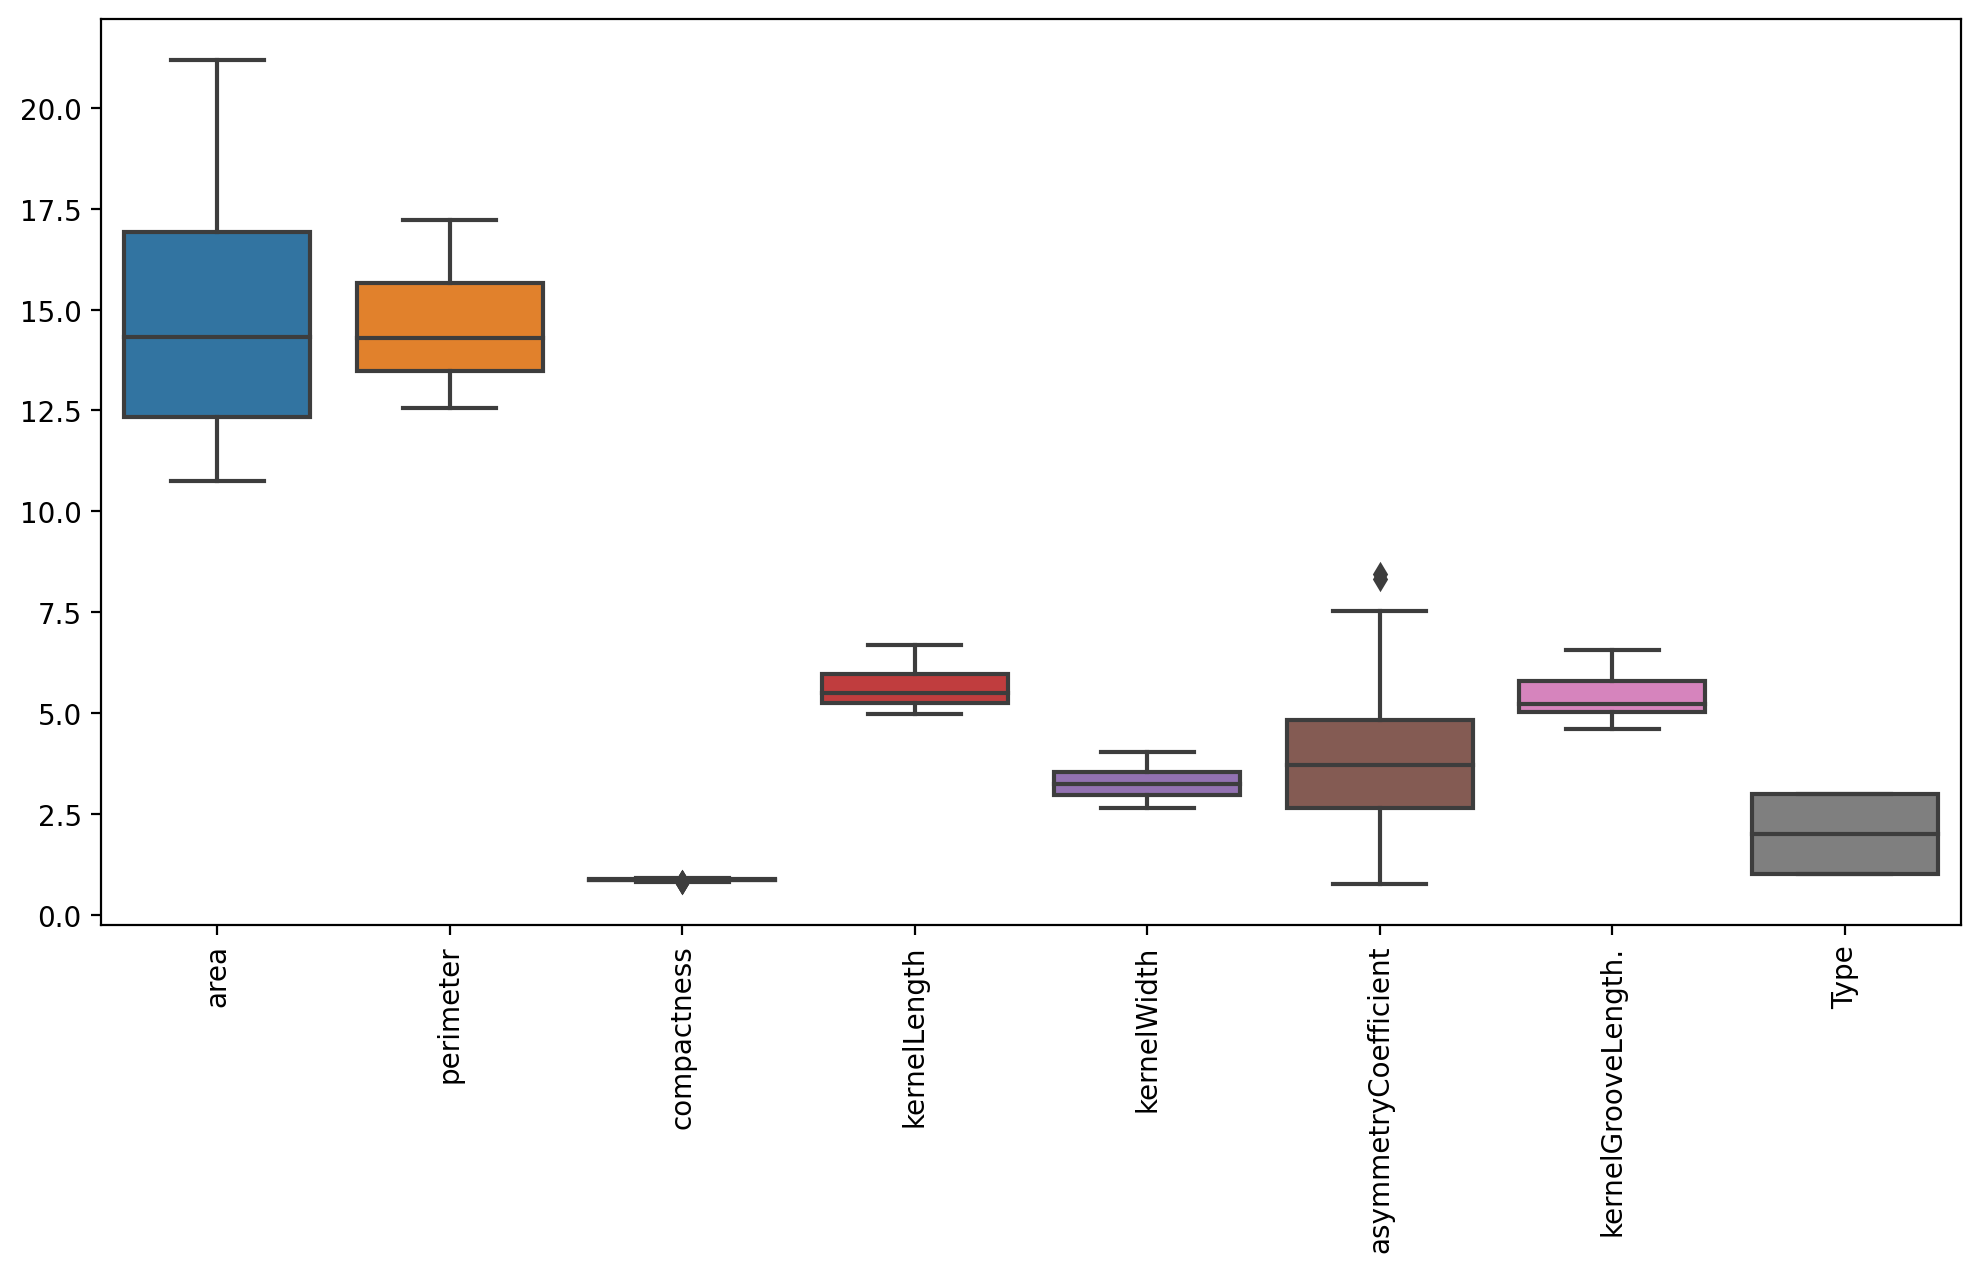

In [111]:
plt.figure(figsize = (12, 6), dpi = 200)
sns.boxplot(data = df)
plt.xticks(rotation = 90);

In [115]:
from scipy import stats
def outlier_detection(df, column):
    z_scores = np.abs(stats.zscore(df[column]))
    df = df[(z_scores < 3)]
    print(column,'has',len(np.where(z_scores>3)[0]),'outliers')
    return df

In [116]:
for column in df.columns:
    df = outlier_detection(df, column)

area has 0 outliers

perimeter has 0 outliers

compactness has 0 outliers

kernelLength has 0 outliers

kernelWidth has 0 outliers

asymmetryCoefficient has 0 outliers

kernelGrooveLength. has 0 outliers

Type has 0 outliers


<AxesSubplot:xlabel='Type', ylabel='count'>

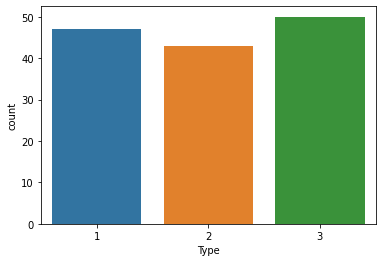

In [121]:
sns.countplot(data = df, x = 'Type')

In [9]:
df.corr()['Type']

area                   -0.388750
perimeter              -0.376535
compactness            -0.515699
kernelLength           -0.303241
kernelWidth            -0.450539
asymmetryCoefficient    0.614652
kernelGrooveLength.    -0.026355
Type                    1.000000
Name: Type, dtype: float64

<AxesSubplot:>

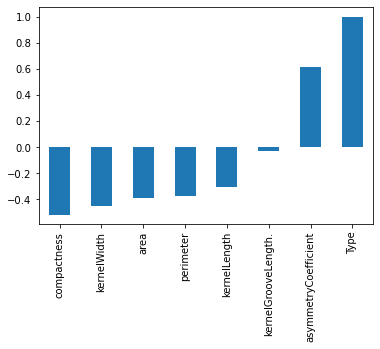

In [11]:
df.corr()['Type'][::-1].sort_values().plot(kind = 'bar')

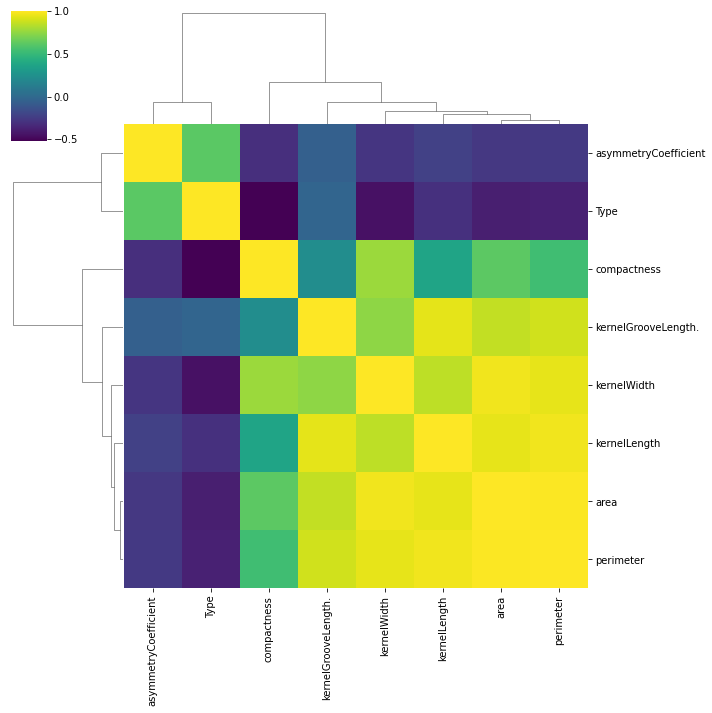

In [13]:
sns.clustermap(df.corr(), cmap = 'viridis')

<AxesSubplot:xlabel='area', ylabel='perimeter'>

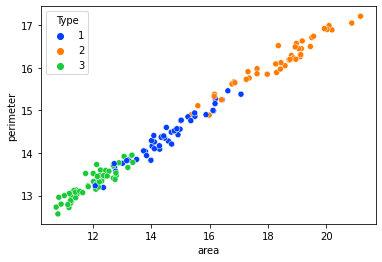

In [20]:
sns.scatterplot(x='area',y='perimeter',hue='Type',
                data=df,palette='bright')

<AxesSubplot:xlabel='perimeter', ylabel='kernelGrooveLength.'>

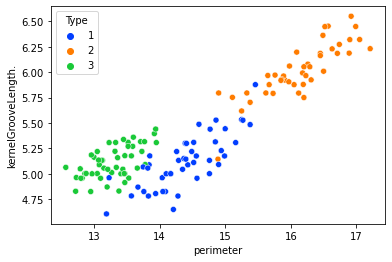

In [19]:
sns.scatterplot(x='perimeter',y='kernelGrooveLength.',hue='Type',
                data=df,palette='bright')

<AxesSubplot:xlabel='kernelWidth', ylabel='kernelLength'>

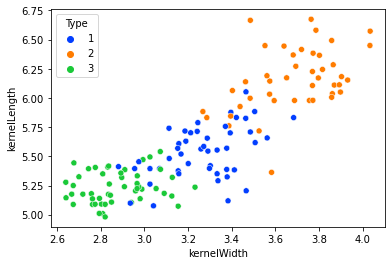

In [23]:
sns.scatterplot(x='kernelWidth',y='kernelLength',hue='Type',
                data=df,palette='bright')

<AxesSubplot:xlabel='asymmetryCoefficient', ylabel='perimeter'>

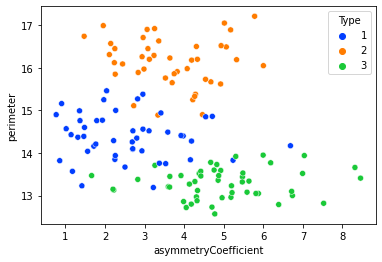

In [120]:
sns.scatterplot(x='asymmetryCoefficient',y='perimeter',hue='Type',
                data=df,palette='bright')

In [26]:
X = df.drop(['Type'], axis = 1)

In [27]:
y = df['Type']

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [30]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [34]:
from sklearn.svm import SVC
svc = SVC(class_weight = 'balanced')

In [31]:
from sklearn.model_selection import GridSearchCV

In [144]:
param_grid = {'C':[1, 1.25, 2],'kernel':['linear','poly', 'rbf', 'sigmoid'],'gamma':['scale','auto']}
grid = GridSearchCV(svc,param_grid)

In [145]:
grid.fit(scaled_X_train,y_train)

GridSearchCV(estimator=SVC(class_weight='balanced'),
             param_grid={'C': [1, 1.25, 2], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [146]:
grid.best_params_

{'C': 1.25, 'gamma': 'scale', 'kernel': 'linear'}

In [ ]:
svc_radial = SVC(class_weight = 'balanced', C = [0.1, 0.2, 0.3, 0.31, 0.320,0.325,0.337,0.35,0.6,1], kernel = 'rbf', gamma = 'scale')

In [128]:
from sklearn.metrics import confusion_matrix,classification_report

In [129]:
grid_pred = grid.predict(scaled_X_test)

In [130]:
confusion_matrix(y_test,grid_pred)

array([[10,  0,  0],
       [ 1,  6,  0],
       [ 0,  0, 11]], dtype=int64)

In [131]:
print(classification_report(y_test,grid_pred))

              precision    recall  f1-score   support



           1       0.91      1.00      0.95        10

           2       1.00      0.86      0.92         7

           3       1.00      1.00      1.00        11



    accuracy                           0.96        28

   macro avg       0.97      0.95      0.96        28

weighted avg       0.97      0.96      0.96        28




In [93]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 70 entries, 0 to 69

Data columns (total 7 columns):

 #   Column                Non-Null Count  Dtype  

---  ------                --------------  -----  

 0   area                  70 non-null     float64

 1   perimeter             70 non-null     float64

 2   compactness           70 non-null     float64

 3   kernelLength          70 non-null     float64

 4   kernelWidth           70 non-null     float64

 5   asymmetryCoefficient  70 non-null     float64

 6   kernelGrooveLength.   70 non-null     float64

dtypes: float64(7)

memory usage: 4.0 KB


In [132]:
test_df = test_df.drop(['ID'], axis = 1)

KeyError: "['ID'] not found in axis"

In [133]:
X_scaled_test = scaler.fit_transform(test_df)

In [134]:
#X_scaled_test

In [135]:
y_preds_final = grid.predict(X_scaled_test)

In [136]:
id = [i for i in range(1, 71)]
submission_df = pd.DataFrame({'ID':id, 'Type':y_preds_final}, index = None)

In [137]:
submission_df.to_csv('results_iter_1.csv', index=False)